In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sbn
import warnings as wr
import csv

wr.filterwarnings('ignore')

df = pd.read_csv("seeds.csv")
print(df,"\n")


     area A  perimeter P  Compactness  length of kernel  width of kernel  \
0     15.26        14.84       0.8710             5.763            3.312   
1     14.88        14.57       0.8811             5.554            3.333   
2     14.29        14.09       0.9050             5.291            3.337   
3     13.84        13.94       0.8955             5.324            3.379   
4     16.14        14.99       0.9034             5.658            3.562   
..      ...          ...          ...               ...              ...   
205   12.19        13.20       0.8783             5.137            2.981   
206   11.23        12.88       0.8511             5.140            2.795   
207   13.20        13.66       0.8883             5.236            3.232   
208   11.84        13.21       0.8521             5.175            2.836   
209   12.30        13.34       0.8684             5.243            2.974   

     asymmetry coeficient  length of kernel groove  type  
0                   2.221   

In [ ]:
print("Shape of the Data","\n")
df.shape



Shape of the Data 



(210, 8)

In [ ]:

print("Description of Data","\n")
df.describe()

Description of Data 



,area A,perimeter P,Compactness,length of kernel,width of kernel,asymmetry coeficient,length of kernel groove,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,209.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.004785
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.817463
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


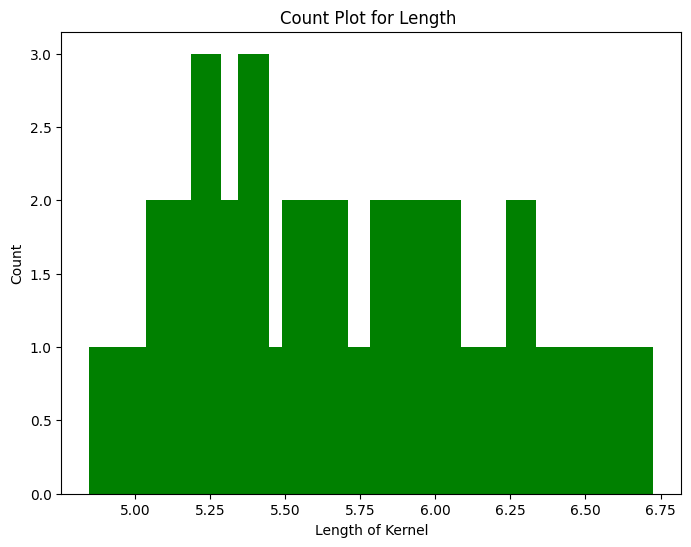

In [ ]:
wheat_det= df['length of kernel'].value_counts()
plot.figure(figsize=(8,6))

plot.bar(wheat_det.index,wheat_det,color='green',width=0.1)
plot.title('Count Plot for Length ')
plot.xlabel('Length of Kernel')
plot.ylabel('Count')
plot.show()


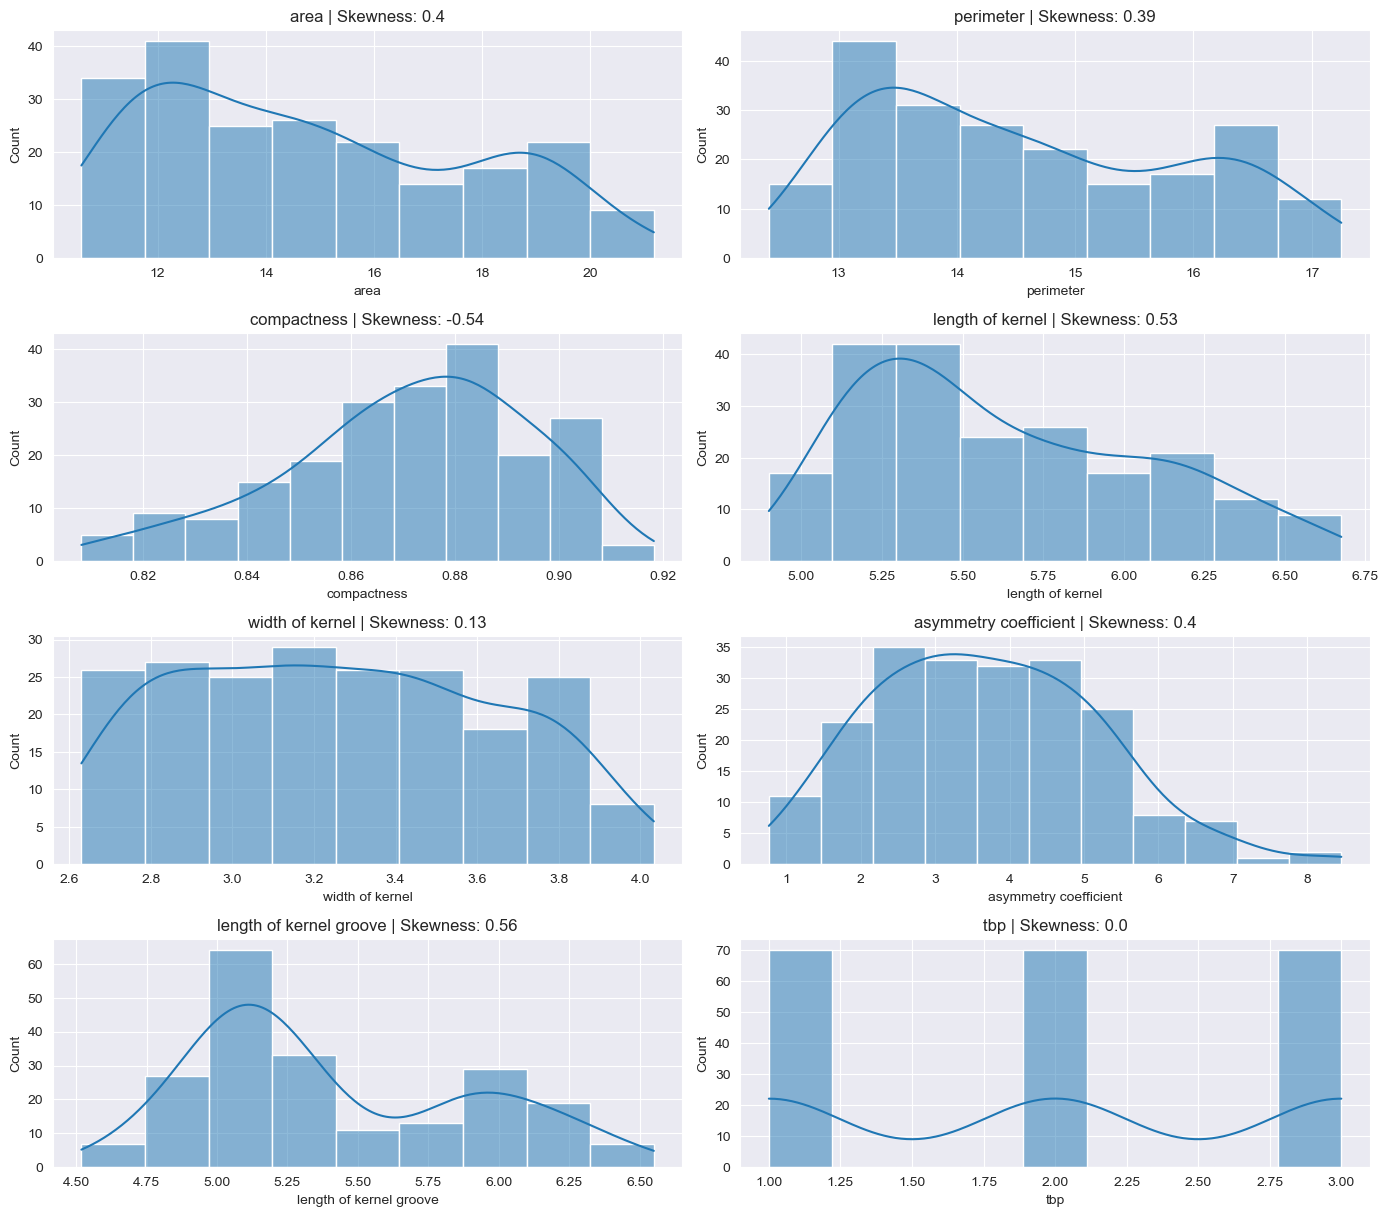

In [ ]:
sbn.set_style("darkgrid")
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
plot.figure(figsize=(14, len(num_cols) * 3))
for idx, feature in enumerate(num_cols, 1):
    plot.subplot(len(num_cols), 2, idx)
    sbn.histplot(df[feature], kde=True)
    plot.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plot.tight_layout()
plot.show()

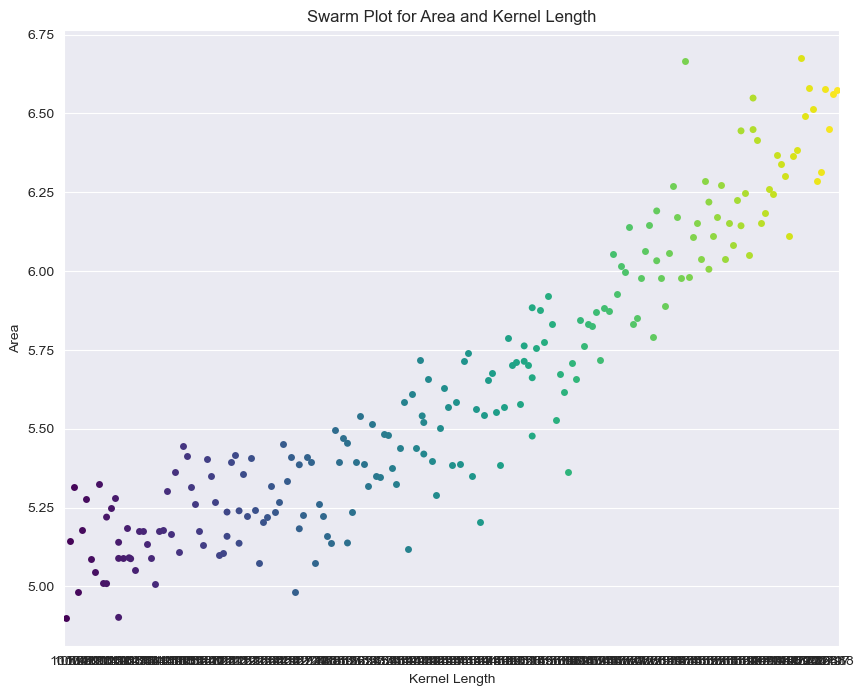

In [ ]:
plot.figure(figsize=(10, 8))

sbn.swarmplot(x="area", y="length of kernel", data=df, palette='viridis')

plot.title('Swarm Plot for Area and Kernel Length')
plot.xlabel('Kernel Length')
plot.ylabel('Area')
plot.show()


<Figure size 1000x600 with 0 Axes>

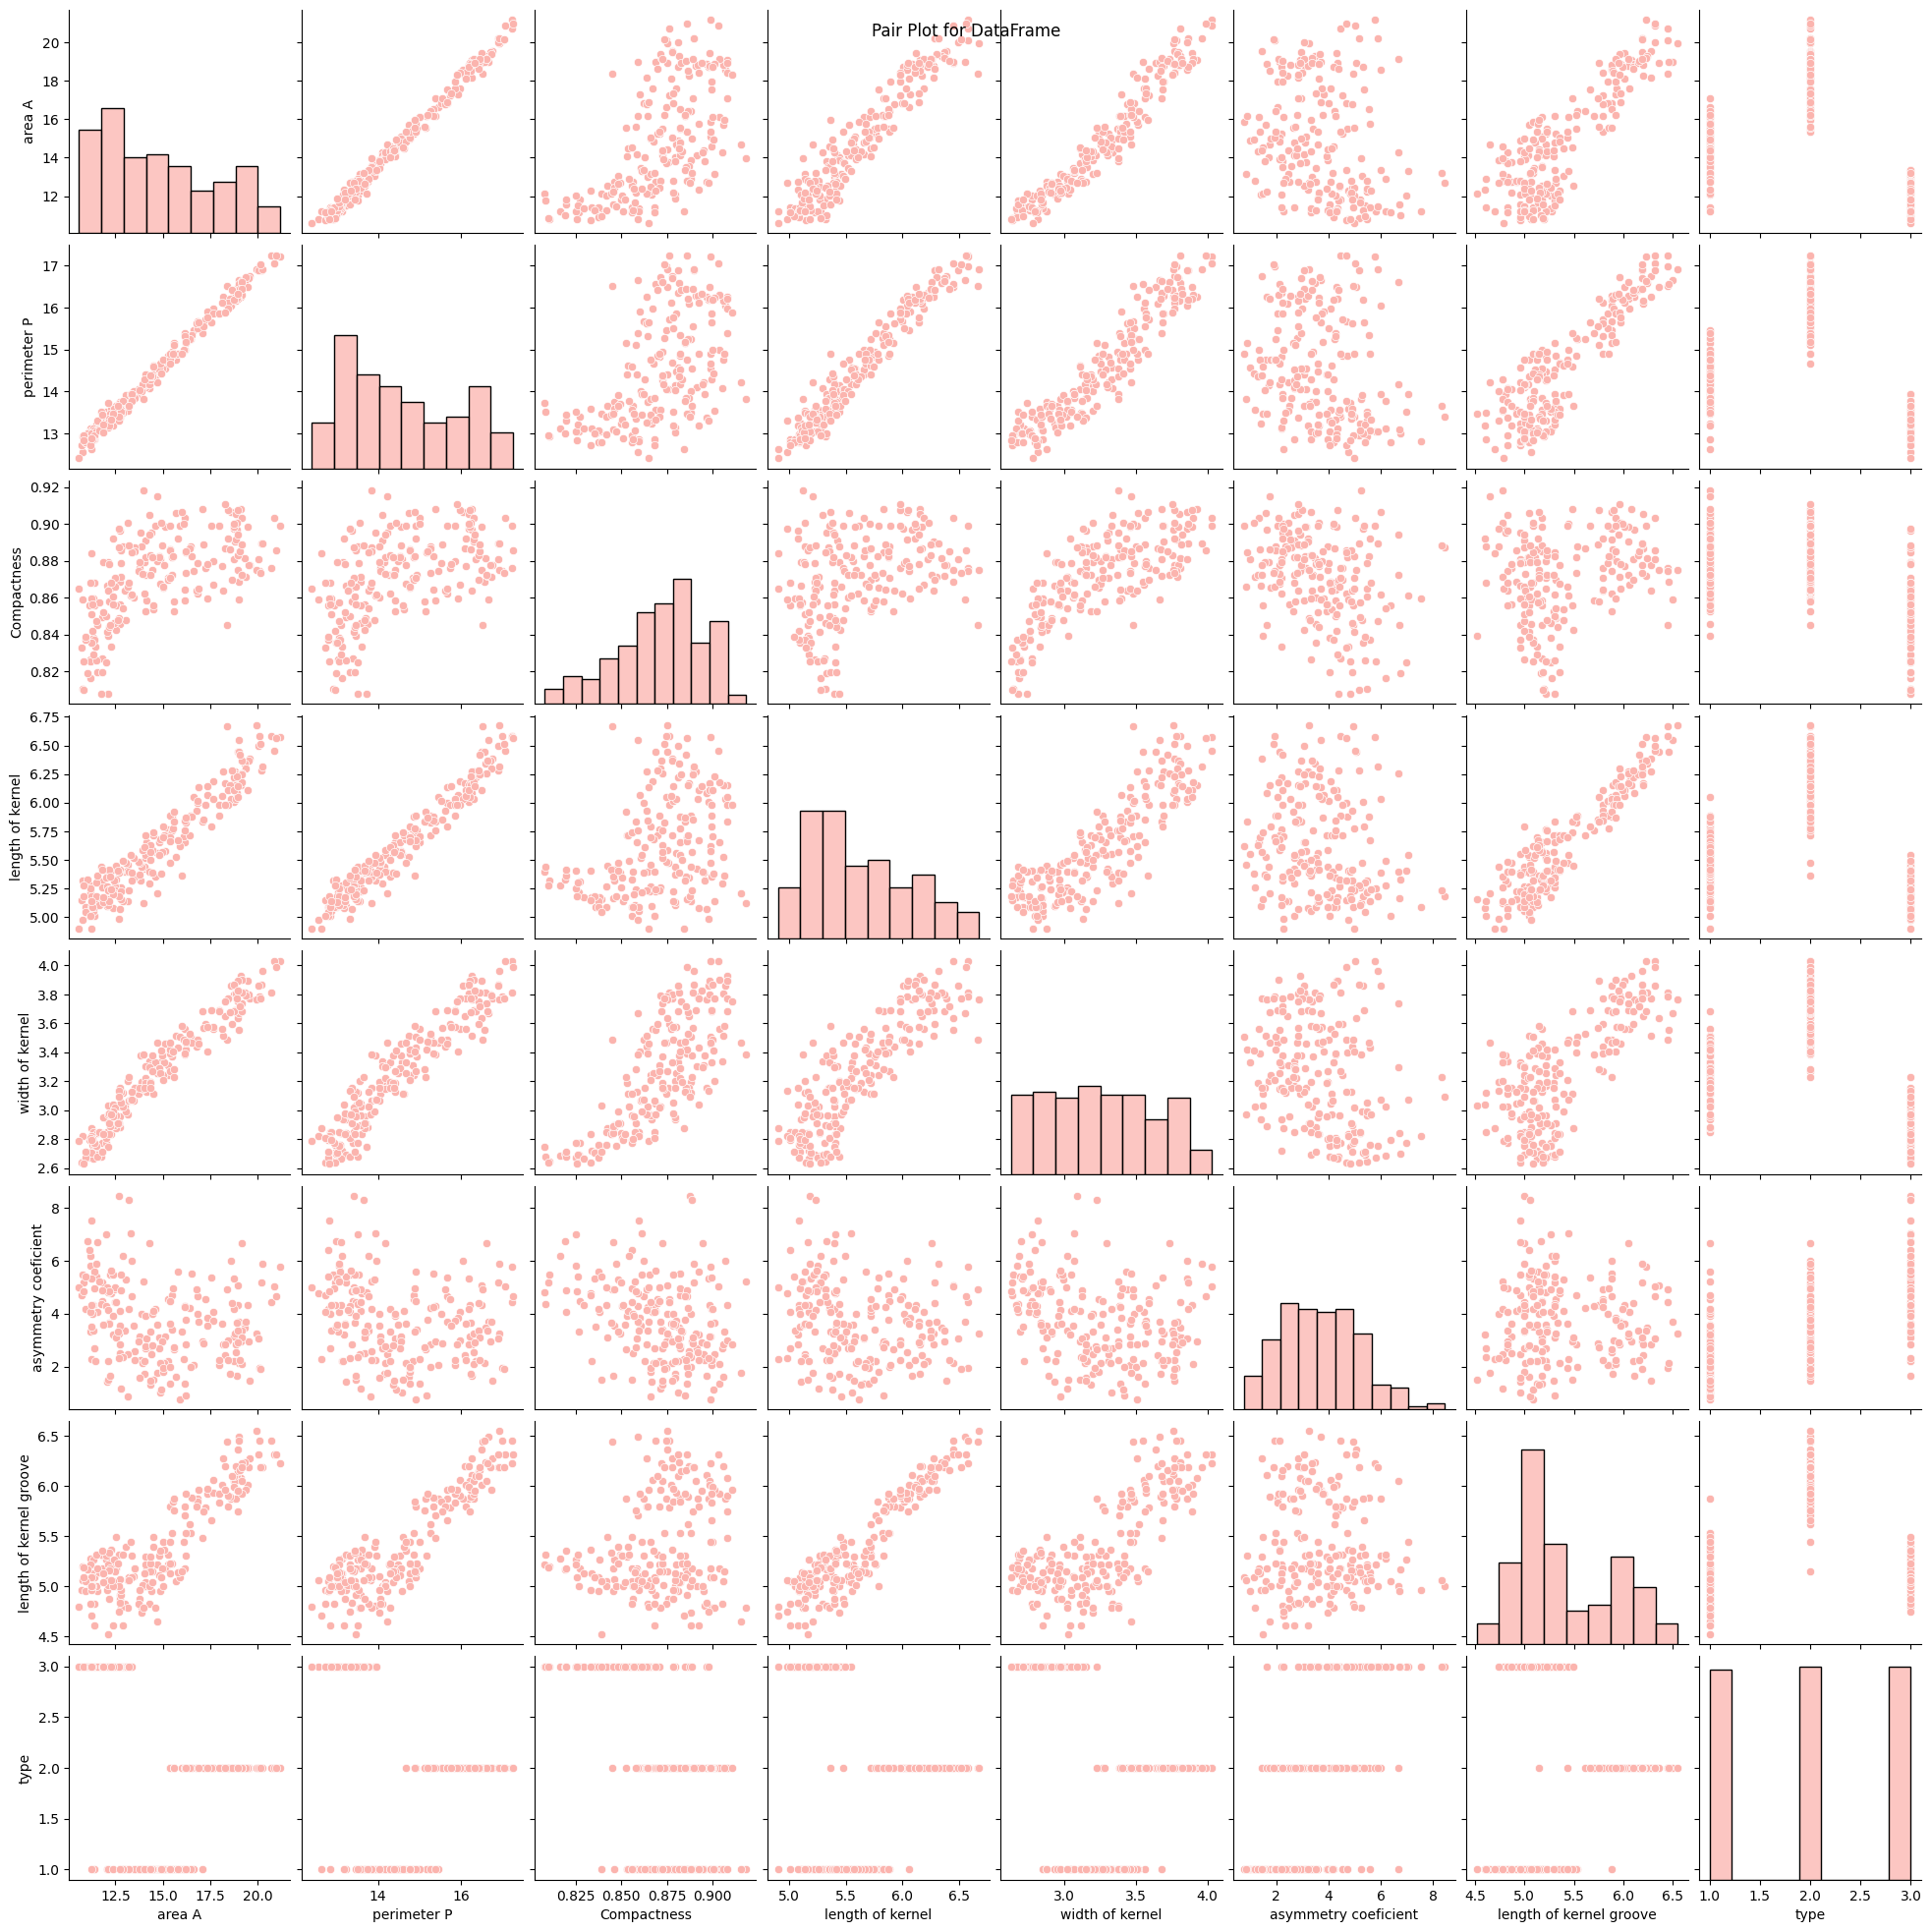

In [ ]:

sbn.set_palette("Pastel1")
plot.figure(figsize=(10, 6))

sbn.pairplot(df)

plot.suptitle('Pair Plot for DataFrame')
plot.show()


<Axes: xlabel='perimeter', ylabel='length of kernel'>

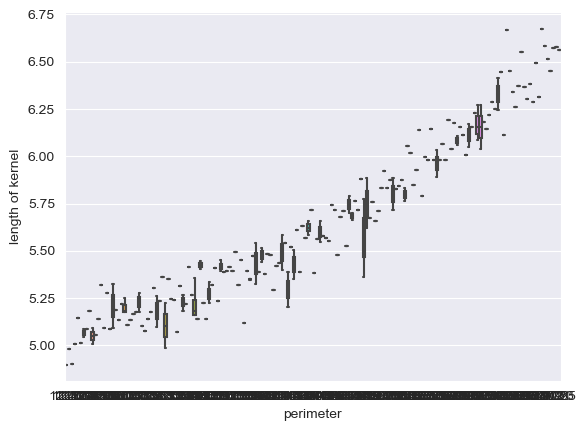

In [ ]:
sbn.boxplot(x='perimeter', y='length of kernel', data=df)


In [ ]:
np.random.seed(0)
X = np.random.rand(1000, 10)
y = np.random.randint(2, size=(1000,))

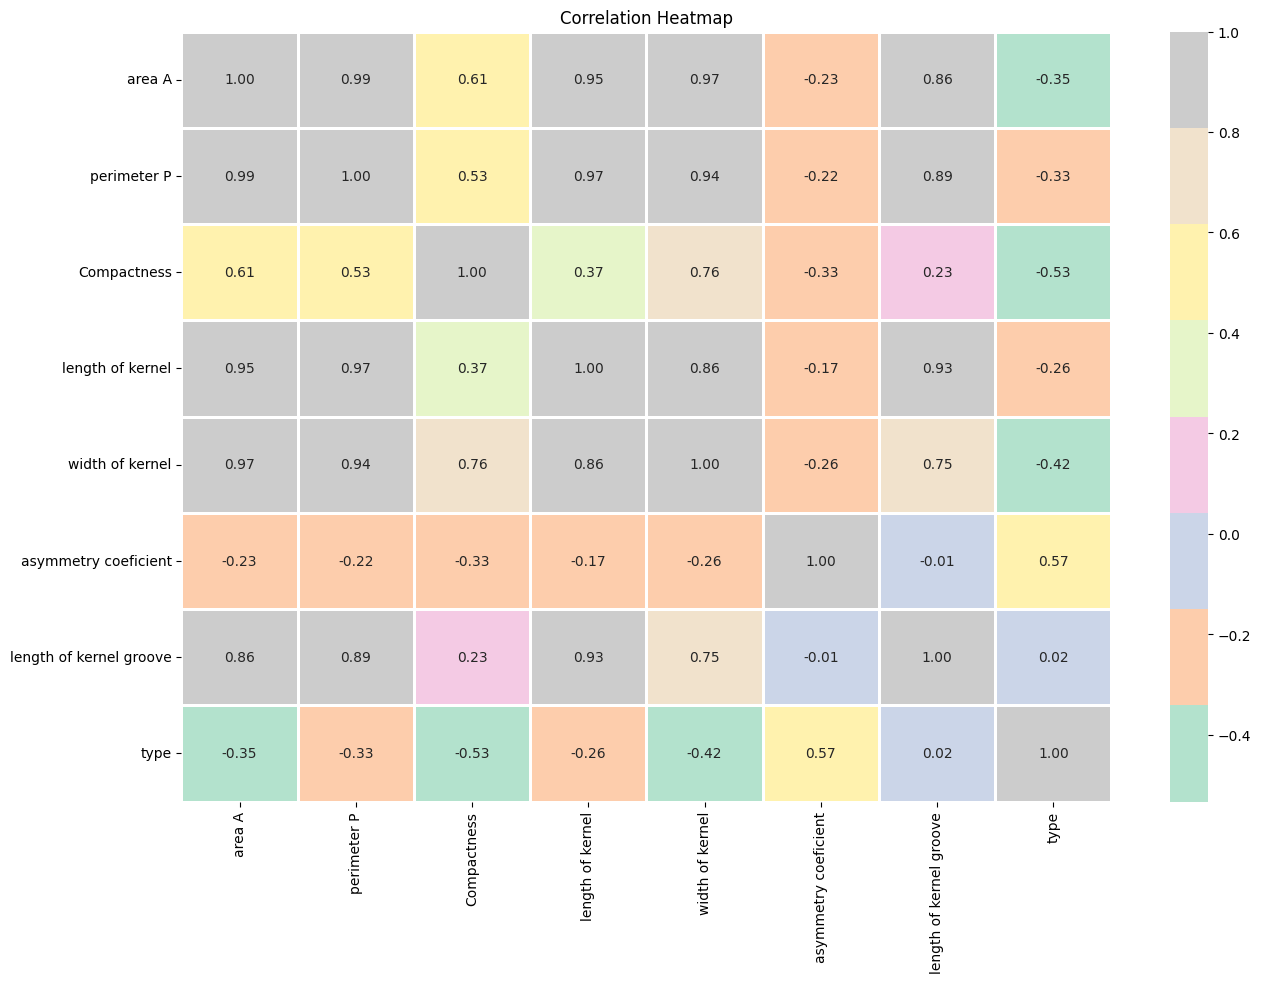

In [ ]:
plot.figure(figsize=(15, 10))

sbn.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plot.title('Correlation Heatmap')
plot.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
22/22 [==============================] - 1s 19ms/step - loss: 0.6991 - accuracy: 0.4743 - val_loss: 0.7002 - val_accuracy: 0.4067
Epoch 2/20
22/22 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5171 - val_loss: 0.7033 - val_accuracy: 0.4533
Epoch 3/20
22/22 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.5029 - val_loss: 0.6959 - val_accuracy: 0.4867
Epoch 4/20
22/22 [==============================] - 0s 5ms/step - loss: 0.6913 - accuracy: 0.5214 - val_loss: 0.7017 - val_accuracy: 0.4667
Epoch 5/20
22/22 [==============================] - 0s 5ms/step - loss: 0.6885 - accuracy: 0.5214 - val_loss: 0.6965 - val_accuracy: 0.4867
Epoch 6/20
22/22 [==============================] - 0s 5ms/step - loss: 0.6898 - accuracy: 0.5329 - val_loss: 0.6994 - val_accuracy: 0.5200
Epoch 7/20
22/22 [==============================] - 0s 6ms/step - loss: 0.6862 - accuracy: 0.5429 - val_loss: 0.6983 - val_accuracy: 0.5200
Epoch 8/20
22/22 [=

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


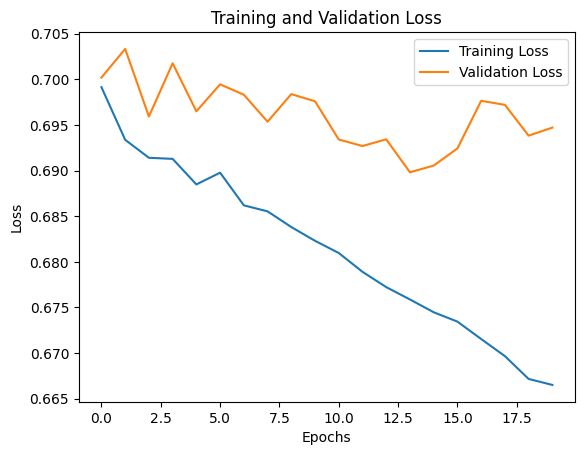

In [ ]:
plot.plot(history.history['loss'], label='Training Loss')
plot.plot(history.history['val_loss'], label='Validation Loss')
plot.title('Training and Validation Loss')
plot.xlabel('Epochs')
plot.ylabel('Loss')
plot.legend()
plot.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss},Test Accuracy: {accuracy}')

5/5 [==============================] - 0s 5ms/step - loss: 0.6974 - accuracy: 0.5000
Test Loss: 0.6973875761032104,Test Accuracy: 0.5
